<a href="https://colab.research.google.com/github/manor-s/knesset_24/blob/main/Behind%20The%20Scenes/Behind_The_Scenes_code_of_reg_exc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methodology

* grouping by subject
* exctracting total lines and likud lines for each subject
* filtering likud lines
* calculating sum of words spoken for subject
* calculating number of lines by party for each subject
* calculating number of references from chair of likud members (most probably invites)
* calculating number of refernces from formal speaker (most probably dialogue) of likud members
* categorizing the subject and creating an index of total lines per subject
* claculating appearance of important words for subject (seperately), gathered by simple nlp processing




In [ ]:
import pandas as pd

mk_data = pd.DataFrame([
    ('male', 'אבי', None, 'דיכטר', 'הליכוד'),
    ('male', 'אבי', None, 'מעוז', 'הציונות הדתית'),
    ('male', 'אביגדור', None, 'ליברמן', 'ישראל ביתנו'),
    ('male', 'אביר', None, 'קארה', 'ימינה'),
    ('female', 'אבתיסאם', None, 'מראענה', 'העבודה'),
    ('male', 'אוסאמה', None, 'סעדי', 'הרשימה המשותפת'),
    ('male', 'אופיר', None, 'אקוניס', 'הליכוד'),
    ('male', 'אופיר', None, 'כץ', 'הליכוד'),
    ('male', 'אופיר', None, 'סופר', 'הציונות הדתית'),
    ('male', 'אורי', None, 'מקלב', 'יהדות התורה'),
    ('male', 'אוריאל', None, 'בוסו', 'ש"ס'),
    ('female', 'אורית', None, 'סטרוק', 'הציונות הדתית'),
    ('female', 'אורית', 'פרקש', 'הכהן', 'כחול לבן'),
    ('female', 'אורלי', 'לוי', 'אבקסיס', 'הליכוד'),
    ('female', 'אורנה', None, 'ברביבאי', 'יש עתיד'),
    ('female', 'אורנה', None, 'שטרקמן', 'ימינה'),
    ('male', 'אחמד', None, 'טיבי', 'הרשימה המשותפת'),
    ('male', 'איימן', None, 'עודה', 'הרשימה המשותפת'),
    ('female', 'אילת', None, 'שקד', 'ימינה'),
    ('female', 'אימאן', "ח'טיב", 'יאסין', 'רע"מ – רשימת האיחוד הערבי'),
    ('male', 'איתמר', None, 'בן גביר', 'הציונות הדתית'),
    ('male', 'איתן', None, 'גינזבורג', 'כחול לבן'),
    ('male', 'אלון', None, 'טל', 'כחול לבן'),
    ('male', 'אלון', None, 'שוסטר', 'כחול לבן'),
    ('male', 'אלי', None, 'אבידר', 'ישראל ביתנו'),
    ('male', 'אלי', 'אליהו', 'כהן', 'הליכוד'),
    ('male', 'אליהו', None, 'ברוכי', 'יהדות התורה'),
    ('female', 'אלינה', "ברדץ'", 'יאלוב', 'ישראל ביתנו'),
    ('male', 'אלכס', None, 'קושניר', 'ישראל ביתנו'),
    ('male', 'אלעזר', None, 'שטרן', 'יש עתיד'),
    ('female', 'אמילי', 'חיה', 'מואטי', 'העבודה'),
    ('male', 'אמיר', None, 'אוחנה', 'הליכוד'),
    ('female', 'אפרת', 'רייטן', 'מרום', 'העבודה'),
    ('male', 'אריה', 'מכלוף', 'דרעי', 'ש"ס'),
    ('male', 'בועז', None, 'טופורובסקי', 'יש עתיד'),
    ('male', 'בני', None, 'גנץ', 'כחול לבן'),
    ('male', 'בנימין', None, 'נתניהו', 'הליכוד'),
    ('male', 'בצלאל', None, "סמוטריץ'", 'הציונות הדתית'),
    ('female', "ג'ידא", None, 'רינאוי-זועבי', 'מרצ'),
    ('female', 'גבי', None, 'לסקי', 'מרצ'),
    ('male', 'גדעון', None, 'סער', 'תקווה חדשה'),
    ('female', 'גילה', None, 'גמליאל', 'הליכוד'),
    ('female', 'גלית', 'דיסטל', 'אטבריאן', 'הליכוד'),
    ('male', 'גלעד', None, 'קריב', 'העבודה'),
    ('male', 'דוד', None, 'אמסלם', 'הליכוד'),
    ('male', 'דוד', None, 'ביטן', 'הליכוד'),
    ('male', 'דסטה', 'גדי', 'יברקן', 'הליכוד'),
    ('male', 'ווליד', None, 'טאהא', 'רע"מ – רשימת האיחוד הערבי'),
    ('male', 'ולדימיר', None, 'בליאק', 'יש עתיד'),
    ('male', 'זאב', None, 'אלקין', 'תקווה חדשה'),
    ('male', 'זאב', 'בנימין', 'בגין', 'תקווה חדשה'),
    ('female', 'חוה', 'אתי', 'עטייה', 'הליכוד'),
    ('male', 'חיים', None, 'ביטון', 'ש"ס'),
    ('male', 'חיים', None, 'כץ', 'הליכוד'),
    ('male', 'חילי', None, 'טרופר', 'כחול לבן'),
    ('male', 'חמד', None, 'עמאר', 'ישראל ביתנו'),
    ('female', 'טטיאנה', None, 'מזרסקי', 'יש עתיד'),
    ('female', 'טלי', None, 'פלוסקוב', 'הליכוד'),
    ('male', 'יאיר', None, 'גולן', 'מרצ'),
    ('male', 'יאיר', None, 'לפיד', 'יש עתיד'),
    ('male', 'יבגני', None, 'סובה', 'ישראל ביתנו'),
    ('male', 'יואב', None, 'בן צור', 'ש"ס'),
    ('male', 'יואב', None, 'גלנט', 'הליכוד'),
    ('male', 'יואב', None, 'סגלוביץ', 'יש עתיד'),
    ('male', 'יואב', None, 'קיש', 'הליכוד'),
    ('male', 'יואל', None, 'רזבוזוב', 'יש עתיד'),
    ('male', 'יובל', None, 'שטייניץ', 'הליכוד'),
    ('male', 'יולי', 'יואל', 'אדלשטיין', 'הליכוד'),
    ('female', 'יוליה', None, 'מלינובסקי', 'ישראל ביתנו'),
    ('male', 'יום טוב', 'חי', 'כלפון', 'ימינה'),
    ('male', 'יוסף', None, 'טייב', 'ש"ס'),
    ('male', 'יוסף', None, 'שיין', 'ישראל ביתנו'),
    ('male', 'יועז', None, 'הנדל', 'תקווה חדשה'),
    ('male', 'יוראי', 'להב', 'הרצנו', 'יש עתיד'),
    ('male', 'ינון', None, 'אזולאי', 'ש"ס'),
    ('female', 'יסמין', None, 'פרידמן', 'יש עתיד'),
    ('female', 'יעל', 'רון', 'בן משה', 'כחול לבן'),
    ('male', 'יעקב', None, 'אשר', 'יהדות התורה'),
    ('male', 'יעקב', None, 'טסלר', 'יהדות התורה'),
    ('male', 'יעקב', None, 'ליצמן', 'יהדות התורה'),
    ('male', 'יעקב', None, 'מרגי', 'ש"ס'),
    ('female', 'יפעת', 'שאשא', 'ביטון', 'תקווה חדשה'),
    ('male', 'יצחק', 'זאב', 'פינדרוס', 'יהדות התורה'),
    ('male', 'יריב', None, 'לוין', 'הליכוד'),
    ('male', 'ישראל', None, 'אייכלר', 'יהדות התורה'),
    ('male', 'ישראל', None, 'כץ', 'הליכוד'),
    ('female', 'לימור', 'מגן', 'תלם', 'ישראל ביתנו'),
    ('male', 'מאזן', None, 'גנאים', 'רע"מ – רשימת האיחוד הערבי'),
    ('female', 'מאי', None, 'גולן', 'הליכוד'),
    ('male', 'מאיר', 'יצחק', 'הלוי', 'תקווה חדשה'),
    ('male', 'מאיר', None, 'כהן', 'יש עתיד'),
    ('male', 'מאיר', None, 'פרוש', 'יהדות התורה'),
    ('male', 'מוסי', None, 'רז', 'מרצ'),
    ('male', 'מופיד', None, 'מרעי', 'כחול לבן'),
    ('male', 'מיכאל', None, 'מלכיאלי', 'ש"ס'),
    ('male', 'מיכאל', 'מרדכי', 'ביטון', 'כחול לבן'),
    ('female', 'מיכל', 'מרים', 'וולדיגר', 'הציונות הדתית'),
    ('female', 'מיכל', None, 'רוזין', 'מרצ'),
    ('female', 'מיכל', 'שיר', 'סגמן', 'תקווה חדשה'),
    ('male', 'מיקי', None, 'לוי', 'יש עתיד'),
    ('female', 'מירב', 'בן', 'ארי', 'יש עתיד'),
    ('female', 'מירב', None, 'כהן', 'יש עתיד'),
    ('female', 'מירי', 'מרים', 'רגב', 'הליכוד'),
    ('male', 'מישל', None, 'בוסקילה', 'תקווה חדשה'),
    ('male', 'מכלוף', 'מיקי', 'זוהר', 'הליכוד'),
    ('male', 'מנסור', None, 'עבאס', 'רע"מ – רשימת האיחוד הערבי'),
    ('female', 'מרב', None, 'מיכאלי', 'העבודה'),
    ('male', 'משה', None, 'אבוטבול', 'ש"ס'),
    ('male', 'משה', None, 'ארבל', 'ש"ס'),
    ('male', 'משה', None, 'גפני', 'יהדות התורה'),
    ('male', 'משה', None, 'טור פז', 'יש עתיד'),
    ('male', 'מתן', None, 'כהנא', 'ימינה'),
    ('male', 'ניצן', None, 'הורוביץ', 'מרצ'),
    ('male', 'ניר', None, 'אורבך', 'ימינה'),
    ('male', 'ניר', None, 'ברקת', 'הליכוד'),
    ('female', 'נירה', None, 'שפק', 'יש עתיד'),
    ('female', 'נעמה', None, 'לזימי', 'העבודה'),
    ('male', 'נפתלי', None, 'בנט', 'ימינה'),
    ('male', 'סימון', None, 'דוידסון', 'יש עתיד'),
    ('male', 'סמי', None, 'אבו שחאדה', 'הרשימה המשותפת'),
    ('male', 'סעיד', None, 'אלחרומי', 'רע"מ – רשימת האיחוד הערבי'),
    ('female', 'עאידה', 'תומא', 'סלימאן', 'הרשימה המשותפת'),
    ('male', 'עודד', None, 'פורר', 'ישראל ביתנו'),
    ('male', 'עופר', None, 'כסיף', 'הרשימה המשותפת'),
    ('female', 'עידית', None, 'סילמן', 'ימינה'),
    ('male', 'עידן', None, 'רול', 'יש עתיד'),
    ('male', 'עיסאווי', None, "פריג'", 'מרצ'),
    ('male', 'עלי', None, 'סלאלחה', 'מרצ'),
    ('male', 'עמיחי', None, 'שיקלי', 'ימינה'),
    ('male', 'עמר', None, 'בר-לב', 'העבודה'),
    ('female', 'ענבר', None, 'בזק', 'יש עתיד'),
    ('male', 'פטין', None, 'מולא', 'הליכוד'),
    ('female', 'פנינה', None, 'תמנו', 'כחול לבן'),
    ('male', 'צבי', None, 'האוזר', 'תקווה חדשה'),
    ('male', 'צחי', None, 'הנגבי', 'הליכוד'),
    ('female', 'קארין', None, 'אלהרר', 'יש עתיד'),
    ('female', 'קטי', 'קטרין', 'שטרית', 'הליכוד'),
    ('female', 'קרן', None, 'ברק', 'הליכוד'),
    ('male', 'רון', None, 'כץ', 'יש עתיד'),
    ('female', 'רות', 'וסרמן', 'לנדה', 'כחול לבן'),
    ('male', 'רם', None, 'בן ברק', 'יש עתיד'),
    ('male', 'רם', None, 'שפע', 'העבודה'),
    ('female', 'שירלי', 'פינטו', 'קדוש', 'ימינה'),
    ('male', 'שלמה', None, 'קרעי', 'הליכוד'),
    ('male', 'שמחה', None, 'רוטמן', 'הציונות הדתית'),
    ('female', 'שרון', 'רופא', 'אופיר', 'ישראל ביתנו'),
    ('female', 'שרן', 'מרים', 'השכל', 'תקווה חדשה'),
    ('female', 'תמר', None, 'זנדברג', 'מרצ'),
], columns=["gender", "first_name", "middle_name", "last_name", "party"])


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
csv_file_path = 'enter file path here'
protocols = pd.read_csv(csv_file_path)

Mounted at /content/drive


In [ ]:
import re

# Create subject_data with unique subjects
subject_data = pd.DataFrame(protocols["subject"].unique(), columns=["subject"])

# Calculate Likud lines count per subject
likud_lines = protocols[protocols["party"] == "הליכוד"].groupby("subject").size().reset_index(name="lines_likud")

# Merge Likud lines count into subject_data
research_data = subject_data.merge(likud_lines, on="subject", how="left")

# Fill NaN values with 0 for subjects without Likud rows
research_data["lines_likud"] = research_data["lines_likud"].fillna(0).astype(int)

# Filter protocols to exclude Likud lines
filtered_protocols = protocols[protocols["party"] != "הליכוד"]

filtered_protocols["word_count"] = filtered_protocols["text"].apply(lambda x: len(str(x).split()))

# Calculate filtered lines count per subject
filtered_lines = filtered_protocols.groupby("subject").size().reset_index(name="filtered_lines")

# Merge filtered lines count into research_data
research_data = research_data.merge(filtered_lines, on="subject", how="left")

# Calculate word count per subject
filtered_lines = filtered_protocols.groupby("subject")["word_count"].sum().reset_index(name="word_count")

# Merge filtered lines count into research_data
research_data = research_data.merge(filtered_lines, on="subject", how="left")

# Fill NaN values with 0 for subjects without lines in filtered_protocols
research_data["filtered_lines"] = research_data["filtered_lines"].fillna(0).astype(int)

<ipython-input-11-3465612ce921>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_protocols["word_count"] = filtered_protocols["text"].apply(lambda x: len(str(x).split()))


In [ ]:
research_data.head()

subject  lines_likud  \
0                       מסמכים שהונחו על שולחן הכנסת            0   
1                                     נאומים בני דקה            8   
2                  ציון יום הניצחון על גרמניה הנאצית            1   
3       הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022            6   
4  ציון יום בנושא קידום מעמד העובד והעובדת וזכויו...           13   

   filtered_lines  word_count  
0              58        6348  
1             124        7802  
2              24        7174  
3              26        1283  
4              42        5492

In [ ]:
mk_data = pd.read_csv("https://drive.google.com/uc?id=1cfjQNsuYScMnyqyeJ6y1MtJ7rE87wm-2")

research_data = pd.DataFrame(protocols["subject"].unique(), columns=["subject"])
filtered_protocols = protocols[protocols["party"] != "הליכוד"]
filtered_protocols["word_count"] = filtered_protocols["text"].apply(lambda x: len(str(x).split()))
filtered_lines = filtered_protocols.groupby("subject").size().reset_index(name="filtered_lines")
research_data = research_data.merge(filtered_lines, on="subject", how="left")
filtered_lines = filtered_protocols.groupby("subject")["word_count"].sum().reset_index(name="word_count")
research_data = research_data.merge(filtered_lines, on="subject", how="left")
research_data["filtered_lines"] = research_data["filtered_lines"].fillna(0).astype(int)

<ipython-input-17-1d77f0dfa341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_protocols["word_count"] = filtered_protocols["text"].apply(lambda x: len(str(x).split()))


In [ ]:

research_data.head()

subject  filtered_lines  \
0                       מסמכים שהונחו על שולחן הכנסת              58   
1                                     נאומים בני דקה             124   
2                  ציון יום הניצחון על גרמניה הנאצית              24   
3       הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022              26   
4  ציון יום בנושא קידום מעמד העובד והעובדת וזכויו...              42   

   word_count  
0        6348  
1        7802  
2        7174  
3        1283  
4        5492

In [ ]:
# lines by party

# dataset
data = filtered_protocols.copy()

# List of parties with >0.5 corr with likud lines
parties = ['הציונות הדתית', 'הרשימה המשותפת', 'יש עתיד', 'ישראל ביתנו', 'כחול לבן', 'ש"ס']

# Group data by subject and count occurrences of each party
grouped_data = data.groupby("subject")["party"].value_counts().unstack(fill_value=0).reset_index()

# Ensure all parties are in the columns, even if they don't appear in the data
for party in parties:
    if party not in grouped_data.columns:
        grouped_data[party] = 0

# Reorder columns (optional) to ensure consistency with the party list
grouped_data = grouped_data[["subject"] + parties]

research_data = research_data.merge(grouped_data, on="subject", how="left")


In [ ]:
# Likud members invites by chairperson

#dataset with subjects and texts of chair referrals
data = filtered_protocols[filtered_protocols["role"].isin(['יו"ר', 'היו"ר', 'יו"ר הכנסת'])].copy()

# Function to count unique mentions of Likud MKs
def count_likud_invites(text, mk_data):
    count = 0
    seen_mentions = set()  # Track processed MKs to avoid duplicates

    # Find all last names in the dataset to check for ambiguity
    all_last_names = mk_data["last_name"].value_counts()

    for _, mk in mk_data.iterrows():
        if mk["party"] == "הליכוד":
            # Adjust titles based on gender, including "ה" prefix
            titles = ["חבר כנסת", "חבר הכנסת"] if mk["gender"] == "male" else ["חברת כנסת", "חברת הכנסת"]

            # Generate patterns for full names
            full_name_patterns = [
                f"{title} {mk['first_name']} {mk['last_name']}" for title in titles
            ] + [
                f"{title} {mk['middle_name']} {mk['last_name']}" for title in titles if mk['middle_name']
            ]

            # Generate patterns for last names
            last_name_patterns = [f"{title} {mk['last_name']}" for title in titles] + [f"{mk['last_name']}"]

            # Check full name patterns first
            for pattern in full_name_patterns:
                if mk['last_name'] in seen_mentions:  # Skip if already matched
                    break
                if re.search(pattern, text):
                    count += 1
                    seen_mentions.add(mk['last_name'])
                    break  # Prioritize full name match

            # Check last name patterns as a fallback
            if mk['last_name'] not in seen_mentions:
                # Validate last name is not ambiguous
                if all_last_names[mk['last_name']] == 1:  # Ensure it's unique to Likud
                    for pattern in last_name_patterns:
                        if re.search(pattern, text):
                            count += 1
                            seen_mentions.add(mk['last_name'])
                            break  # Stop after matching last name

    return count

# Apply the function to count invites
data["likud_invites"] = data["text"].apply(lambda x: count_likud_invites(x, mk_data))

# Group by subject and calculate likud_invites
grouped_data = data.groupby("subject", as_index=False).agg({"likud_invites": "sum"})

research_data = research_data.merge(grouped_data, on="subject", how="left")

In [ ]:
# Likud members referrals by formal speaker

# dataset of formal speaker lines (minister, committee chair)
data = filtered_protocols[
    (filtered_protocols["role"].notnull()) &
    (~filtered_protocols["role"].isin(['יו"ר', 'היו"ר', 'יו"ר הכנסת']))
].copy()

# Function to count unique mentions of Likud MKs
def count_likud_refs(text, mk_data):
    count = 0
    seen_mentions = set()  # Track processed MKs to avoid duplicates

    # Handle cases where text is null or NaN
    if not isinstance(text, str):
        return 0

    # Find all last names and first names in the dataset to check for ambiguity
    all_last_names = mk_data["last_name"].value_counts()
    all_first_names = mk_data["first_name"].value_counts()

    for _, mk in mk_data.iterrows():
        if mk["party"] == "הליכוד":
            # Adjust titles based on gender, including "ה" prefix
            titles = ["חבר כנסת", "חבר הכנסת"] if mk["gender"] == "male" else ["חברת כנסת", "חברת הכנסת"]

            # Generate patterns for full names
            full_name_patterns = [
                f"{title} {mk['first_name']} {mk['last_name']}" for title in titles
            ] + [
                f"{title} {mk['middle_name']} {mk['last_name']}" for title in titles if mk['middle_name']
            ]

            # Generate patterns for last names
            last_name_patterns = [f"{title} {mk['last_name']}" for title in titles] + [f"{mk['last_name']}"]

            # Generate patterns for first names as a fallback
            first_name_patterns = [f"{title} {mk['first_name']}" for title in titles] + [f"{mk['first_name']}"]

            # Check full name patterns first
            for pattern in full_name_patterns:
                if mk['last_name'] in seen_mentions:  # Skip if already matched
                    break
                if re.search(pattern, text):
                    count += 1
                    seen_mentions.add(mk['last_name'])
                    break  # Prioritize full name match

            # Check last name patterns as a fallback
            if mk['last_name'] not in seen_mentions:
                # Validate last name is not ambiguous
                if all_last_names[mk['last_name']] == 1:  # Ensure it's unique to Likud
                    for pattern in last_name_patterns:
                        if re.search(pattern, text):
                            count += 1
                            seen_mentions.add(mk['last_name'])
                            break  # Stop after matching last name

            # Check first name patterns as the final fallback
            if mk['last_name'] not in seen_mentions and mk['first_name'] not in seen_mentions:
                # Validate first name is not ambiguous
                if all_first_names[mk['first_name']] == 1:  # Ensure it's unique to Likud
                    for pattern in first_name_patterns:
                        if re.search(pattern, text):
                            count += 1
                            seen_mentions.add(mk['first_name'])  # Mark first name as matched
                            break  # Stop after matching first name

    return count


# Apply the function to count invites
data["likud_refs"] = data["text"].apply(lambda x: count_likud_refs(x, mk_data))

# Group by subject and calculate Likud references
grouped_data = (
    data.groupby("subject", as_index=False)
    .agg(likud_refs=("likud_refs", "sum"))
)

research_data = research_data.merge(grouped_data, on="subject", how="left")

research_data["likud_refs"] = research_data["likud_refs"].fillna(0).astype(int)

In [ ]:
# Categorize subjects and compute category-specific scores based on the number of lines

data = filtered_protocols.copy()

# Classify subjects based on keywords
def classify_subject(subject):
    # if re.search(r"חינוך|השכלה|סטודנט|מחקר|פיתוח|אוניברסיטה|לימודים|מורים", subject):
    #     return "Education_Research"
    if re.search(r"חייל|צבא|בטחון|טרור|שב\"כ|עימותים|הטרור|המינהל האזרחי|אלימות", subject):
        return "Defense_Security"
    # elif re.search(r"בריאות|מוגבלות|רווחה|נפש|רפואה|חולים|סיעוד|אחות|מגפת|מגפה", subject):
    #     return "Welfare_Health"
    # elif re.search(r"מסים|כלכלה|מיסים|עבודה|תעסוקה|מענק|עסקים|בנק|הלוואה|סבסוד|כספים", subject):
    #     return "Economy_Finance"
    # elif re.search(r"עונש|משפט|משטרה|עבירה|סגירת תיק|שוטר|חקירה|אלימות", subject):
    #     return "Police_Crime"
    # elif re.search(r"ציון יום|זיכרון|ציון זכרו|אירועי|ישיבה לכבוד|שנים להקמת", subject):
    #     return "Ceremonies_Commemorations"
    # elif re.search(r"חקלאות|סביבה|ירוק|מזון|שקיות|מיחזור", subject):
    #     return "Environment_Agriculture"
    # elif re.search(r"תחבורה|רכבת|כביש|תחבורה ציבורית|חשמל|ניידות|משאית|אוטובוס|סלולרי", subject):
    #     return "Transportation_Infrastructure"
    # elif re.search(r"צרכן|שירותים|שיווק|עסקה|מוצרים", subject):
    #     return "Consumerism"
    # elif re.search(r"תרבות|חברה|הפליה|זכויות|קהילה|מגדר|אוכלוסין|ערים", subject):
    #     return "Culture_Society"
    # elif re.search(r"דת|יהדות|איסלאם|נצרות|רבנות|כשרות|תפילה|בית כנסת|מסגד|כנסייה", subject):
    #     return "Religion"
    # elif re.search(r"ממשלה|חבר כנסת|ועדה|יושב-ראש|שר|ועדות הכנסת|נאומים|הצהרה|שאילתא|שאילתות|הודעה|חבר הכנסת|חברת הכנסת|שולחן הכנסת|חוק", subject):
    #     return "Politics_Governance"
    # else:
    #     return "Other"

# Classify subjects and create categories
data["category"] = data["subject"].apply(classify_subject)

# Add a column for the number of lines (all rows treated as one line for simplicity)
data["lines"] = 1

# Create a pivot table
pivot_table = data.pivot_table(
    index="subject",
    columns="category",
    values="lines",
    aggfunc="sum",
    fill_value=0
)

pivot_table.columns = [f"subject_category_{col}" for col in pivot_table.columns]

ft = pivot_table.reset_index()

research_data = research_data.merge(ft,  on="subject", how="left")


In [ ]:
# List of base words
word_list = [
    "חבר", "ישראל", "מדינה", "ממשלה", "שר",
    "חשוב", "אזרח", "ערבי", "כבוד", "חייל", "משפט", "ביטחון",
    "קואליציה",
]

#  dataset
data = filtered_protocols[~filtered_protocols["role"].isin(['יו"ר', 'היו"ר', 'יו"ר הכנסת'])].copy()


# Combine text for each subject

data["text"] = data["text"].fillna("").astype(str)

grouped_data = data.groupby("subject")["text"].apply(" ".join).reset_index()

# Function to count word occurrences, accounting for prefixes and suffixes
def count_word_occurrences(text, word):
    # Regular expression pattern to match the word with all prefixes/suffixes
    pattern = rf'{re.escape(word)}'
    return len(re.findall(pattern, text))

# Create a column for each word and count its occurrences in the aggregated "text" column
for word in word_list:
    grouped_data[f"count_{word}"] = grouped_data["text"].apply(lambda x: count_word_occurrences(x, word))

# Drop the aggregated text column if no longer needed
grouped_data = grouped_data.drop(columns=["text"])

research_data = research_data.merge(grouped_data, on="subject", how="left")

In [ ]:
research_data = research_data.fillna(0)


In [ ]:
research_data.head()

subject  lines_likud  \
0                       מסמכים שהונחו על שולחן הכנסת            0   
1                                     נאומים בני דקה            8   
2                  ציון יום הניצחון על גרמניה הנאצית            1   
3       הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022            6   
4  ציון יום בנושא קידום מעמד העובד והעובדת וזכויו...           13   

   filtered_lines  word_count  הציונות הדתית  הרשימה המשותפת  יש עתיד  \
0              58        6348            0.0             0.0      0.0   
1             124        7802            7.0             5.0     16.0   
2              24        7174            1.0             1.0      1.0   
3              26        1283            0.0             3.0      0.0   
4              42        5492            0.0             2.0      2.0   

   ישראל ביתנו  כחול לבן   ש"ס  ...  count_ממשלה  count_שר  count_חשוב  \
0          0.0       0.0   0.0  ...          8.0      51.0         0.0   
1          0.0       6.0  17.0  ...         12.0     122.0        11.0   
2          1.0       1.0   1.0  ...          1.0     120.0        16.0   
3          0.0       0.0   1.0  ...          0.0       9.0         3.0   
4          0.0       1.0   3.0  ...          7.0      97.0        11.0   

   count_אזרח  count_ערבי  count_כבוד  count_חייל  count_משפט  count_ביטחון  \
0         2.0         4.0         0.0         2.0        12.0           9.0   
1         8.0         6.0        23.0         3.0         8.0           8.0   
2        11.0         7.0        15.0        16.0         3.0           3.0   
3         1.0         0.0         1.0         0.0         0.0           0.0   
4         4.0         8.0         7.0         1.0         1.0           2.0   

   count_קואליציה  
0             0.0  
1             4.0  
2             1.0  
3             3.0  
4             3.0  

[5 rows x 26 columns]

In [ ]:
corr_matrix = research_data.drop(["subject"], axis=1).corr()
corr_matrix

lines_likud  filtered_lines  word_count  \
lines_likud                           1.000000        0.908380    0.764058   
filtered_lines                        0.908380        1.000000    0.889711   
word_count                            0.764058        0.889711    1.000000   
הציונות הדתית                         0.742959        0.764344    0.686932   
הרשימה המשותפת                        0.539634        0.679838    0.526533   
יש עתיד                               0.608224        0.452128    0.365785   
ישראל ביתנו                           0.815774        0.675495    0.645358   
כחול לבן                              0.610128        0.462517    0.450504   
ש"ס                                   0.586771        0.759598    0.805750   
likud_invites                         0.870725        0.806667    0.721019   
likud_refs                            0.405979        0.493512    0.560091   
subject_category_Defense_Security     0.700035        0.552869    0.460320   
count_חבר                             0.570696        0.742853    0.864885   
count_ישראל                           0.696276        0.792918    0.920287   
count_מדינה                           0.665785        0.779009    0.831929   
count_ממשלה                           0.737621        0.861903    0.889618   
count_שר                              0.680965        0.818754    0.956862   
count_חשוב                            0.611127        0.705586    0.818202   
count_אזרח                            0.593601        0.684410    0.730233   
count_ערבי                            0.580983        0.726489    0.812857   
count_כבוד                            0.498569        0.659135    0.780301   
count_חייל                            0.737613        0.572536    0.538725   
count_משפט                            0.564627        0.563091    0.569274   
count_ביטחון                          0.715498        0.671632    0.723972   
count_קואליציה                        0.744332        0.845896    0.858621   

                                   הציונות הדתית  הרשימה המשותפת   יש עתיד  \
lines_likud                             0.742959        0.539634  0.608224   
filtered_lines                          0.764344        0.679838  0.452128   
word_count                              0.686932        0.526533  0.365785   
הציונות הדתית                           1.000000        0.357728  0.446681   
הרשימה המשותפת                          0.357728        1.000000  0.134426   
יש עתיד                                 0.446681        0.134426  1.000000   
ישראל ביתנו                             0.616777        0.195207  0.580242   
כחול לבן                                0.537088        0.092580  0.701679   
ש"ס                                     0.492035        0.550488  0.099532   
likud_invites                           0.670897        0.462325  0.521077   
likud_refs                              0.369105        0.321335  0.186104   
subject_category_Defense_Security       0.627488        0.246679  0.615054   
count_חבר                               0.522298        0.474385  0.198354   
count_ישראל                             0.630381        0.461017  0.318745   
count_מדינה                             0.486198        0.493456  0.228353   
count_ממשלה                             0.615404        0.517439  0.309822   
count_שר                                0.635400        0.463720  0.343136   
count_חשוב                              0.503277        0.392418  0.289760   
count_אזרח                              0.429717        0.393566  0.181094   
count_ערבי                              0.522967        0.560447  0.224823   
count_כבוד                              0.495841        0.461485  0.192982   
count_חייל                              0.554329        0.169968  0.678253   
count_משפט                              0.508018        0.283636  0.361924   
count_ביטחון                            0.650709        0.296323  0.470790   
count_קואליציה                          0.631123        

In [ ]:
research_data.to_csv('/content/drive/My Drive/Colab Notebooks/Regression Project 3/final_product.csv', index=False)


In [ ]:
# research_data = research_data.drop(["העבודה", "יהדות התורה", "ימינה", "מרצ", 'רע"מ – רשימת האיחוד הערבי', "תקווה חדשה", "subject_category_Economy_Finance", "subject_category_Environment_Agriculture",
#                                     "subject_category_Police_Crime", "count_כנסת", "count_חברה", "count_יהודי", "count_בריאות"], axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

In [ ]:
X = research_data.drop(["subject"], axis=1)

In [ ]:
X.shape

(184, 25)

In [ ]:
isf = IsolationForest(n_estimators=50, max_samples=184+18,
                      contamination=0.1, random_state=rng)

In [ ]:
isf.fit(X)

In [ ]:
df_isf = pd.DataFrame({"is_outlier" : isf.predict(X),
                       "score" :      isf.decision_function(X)})
df_isf.sort_values('score').head(25)

In [ ]:
lof = LocalOutlierFactor(n_neighbors=int(184**0.5),
                         contamination=0.1,
                         novelty=True)

In [ ]:
lof.fit(X)

In [ ]:
df_lof = pd.DataFrame({"is_outlier" : lof.predict(X),
                       "score" :      lof.decision_function(X)})
df_lof.sort_values('score').head(25)

In [ ]:
ocs = OneClassSVM(nu=0.05).fit(X)
df_ocs = pd.DataFrame({"is_outlier" : ocs.predict(X),
                       "score" :      ocs.decision_function(X)})
df_ocs.sort_values('score').head(25)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)  # Drop the target column
y = research_data["lines_likud"]  # Target column

# Discretize the target variable into bins with equal frequency
num_bins = 5  # Number of bins
y_binned = pd.qcut(y, q=num_bins, labels=False, duplicates="drop")

# Check bin distribution
print("Bin distribution:\n", pd.Series(y_binned).value_counts())

# Stratified train-test split using the binned target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, random_state=42
)

# Verify stratification
train_bins = pd.qcut(y_train, q=num_bins, labels=False, duplicates="drop")
test_bins = pd.qcut(y_test, q=num_bins, labels=False, duplicates="drop")

print("\nTrain bin distribution:\n", pd.Series(train_bins).value_counts())
print("\nTest bin distribution:\n", pd.Series(test_bins).value_counts())

In [ ]:
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 147 rows
Testing set size: 37 rows


In [ ]:
X.shape

(184, 24)

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import optuna


# Define the Optuna objective function for Random Forest Regressor
def objective(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    random_state = 42  # Ensuring reproducibility

    # Define the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state
    )
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return -np.mean(cv_scores)  # Minimize negative R²

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="minimize", study_name="RandomForest Optimization")
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Updated to avoid the warning
accuracy = 100 * (1 - abs(r2))  # Interpret accuracy

# Print metrics
print("R² Score:", r2)
print("RMSE:", rmse)
print("Accuracy:", accuracy)


[I 2024-12-09 21:28:47,245] A new study created in memory with name: RandomForest Optimization
[I 2024-12-09 21:28:49,443] Trial 0 finished with value: -0.5691076020695054 and parameters: {'n_estimators': 268, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.5691076020695054.
[I 2024-12-09 21:28:50,495] Trial 1 finished with value: -0.5312379639146638 and parameters: {'n_estimators': 130, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.5691076020695054.
[I 2024-12-09 21:28:52,071] Trial 2 finished with value: -0.5611525854560495 and parameters: {'n_estimators': 203, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 0 with value: -0.5691076020695054.
[I 2024-12-09 21:28:54,521] Trial 3 finished with value: -0.5794515285494289 and parameters: {'n_estimators': 287, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 3 with value: -0.57945152

Best Hyperparameters: {'n_estimators': 101, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2}
R² Score: 0.561091428549213
RMSE: 47.4063016972036
Accuracy: 43.8908571450787


In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the model
model = RandomForestRegressor(random_state=42)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo, scoring="neg_mean_squared_error")  # Use MSE instead of R²

# Mean RMSE across folds
mean_rmse = np.sqrt(-np.mean(scores))  # Convert negative MSE to RMSE
print("Mean RMSE (LOOCV):", mean_rmse)


Mean RMSE (LOOCV): 24.68447674939261


In [ ]:
import optuna
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the objective function
def objective(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Initialize model with hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])  # Append the prediction
        y_true.append(y_test)  # Append the true value

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store the mean R² for tracking
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse

# Run Optuna optimization
study = optuna.create_study(direction="minimize")  # Minimize RMSE
study.optimize(objective, n_trials=50)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-09 22:05:26,706] A new study created in memory with name: no-name-36647525-153d-417b-8846-39832923a5b3
[I 2024-12-09 22:06:26,143] Trial 0 finished with value: 31.035881926477856 and parameters: {'n_estimators': 152, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 0 with value: 31.035881926477856.
[I 2024-12-09 22:07:24,794] Trial 1 finished with value: 26.812270148152805 and parameters: {'n_estimators': 143, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 26.812270148152805.
[I 2024-12-09 22:08:36,530] Trial 2 finished with value: 32.666536881210064 and parameters: {'n_estimators': 179, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 1 with value: 26.812270148152805.
[I 2024-12-09 22:09:57,449] Trial 3 finished with value: 24.80939094370328 and parameters: {'n_estimators': 121, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 3 with value: 2

Best Hyperparameters: {'n_estimators': 126, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2}
Best RMSE: 23.823205969574623
Best R²: 0.7622679457113541


                              Feature  Importance
0                      filtered_lines    0.531699
5                         ישראל ביתנו    0.134002
8                       likud_invites    0.093600
13                        count_מדינה    0.060713
1                          word_count    0.030437
12                        count_ישראל    0.015018
3                      הרשימה המשותפת    0.014673
16                         count_חשוב    0.013473
22                       count_ביטחון    0.012520
17                         count_אזרח    0.012311
10  subject_category_Defense_Security    0.012309
14                        count_ממשלה    0.010987
2                       הציונות הדתית    0.010180
23                     count_קואליציה    0.010117
15                           count_שר    0.009729
20                         count_חייל    0.008225
21                         count_משפט    0.004354
4                             יש עתיד    0.004287
11                          count_חבר    0.003436


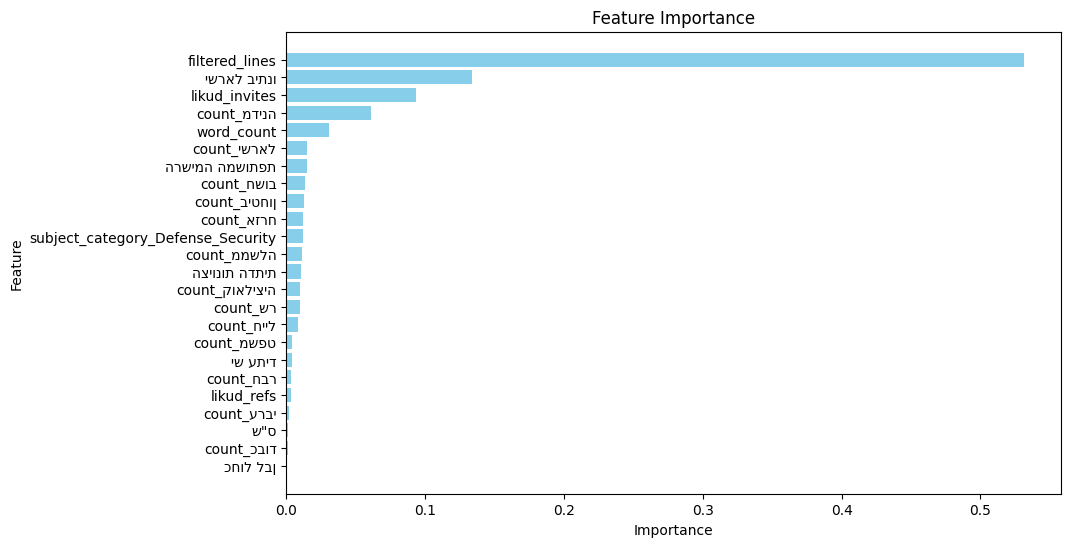

In [ ]:
# Train the model with the best hyperparameters on the entire dataset
best_model = RandomForestRegressor(
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X, y)

# Get feature importance
feature_importance = best_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
print(importance_df)

# Optional: Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()


In [ ]:
import optuna
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge  # Linear model with regularization
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    alpha = trial.suggest_float("alpha", 0.01, 10.0, log=True)  # Regularization strength

    # Initialize the Ridge regression model
    model = Ridge(alpha=alpha)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])  # Append the prediction
        y_true.append(y_test)  # Append the true value

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store R² in Optuna for later access
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")  # Minimize RMSE
study.optimize(objective, n_trials=50)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-09 22:55:14,139] A new study created in memory with name: no-name-524868dc-e56a-47ed-943f-446dc6eb36dc
[I 2024-12-09 22:55:15,777] Trial 0 finished with value: 14.351808368248134 and parameters: {'alpha': 0.09124954996637472}. Best is trial 0 with value: 14.351808368248134.
[I 2024-12-09 22:55:16,845] Trial 1 finished with value: 14.351274333843293 and parameters: {'alpha': 0.8292427778356481}. Best is trial 1 with value: 14.351274333843293.
[I 2024-12-09 22:55:18,008] Trial 2 finished with value: 14.351475442685988 and parameters: {'alpha': 0.5418549712715846}. Best is trial 1 with value: 14.351274333843293.
[I 2024-12-09 22:55:19,178] Trial 3 finished with value: 14.351582191557887 and parameters: {'alpha': 0.3941541048372803}. Best is trial 1 with value: 14.351274333843293.
[I 2024-12-09 22:55:20,411] Trial 4 finished with value: 14.348882941094464 and parameters: {'alpha': 7.527821843571804}. Best is trial 4 with value: 14.348882941094464.
[I 2024-12-09 22:55:21,620] Tri

Best Hyperparameters: {'alpha': 8.044064618293554}
Best RMSE: 14.348867787588818
Best R²: 0.9137572492638981


                              Feature  Coefficient
5                         ישראל ביתנו     3.921542
8                       likud_invites     0.988901
6                            כחול לבן    -0.819626
22                       count_ביטחון     0.628065
23                     count_קואליציה    -0.554117
12                        count_ישראל     0.418617
4                             יש עתיד     0.355298
17                         count_אזרח    -0.337474
18                         count_ערבי    -0.333468
0                      filtered_lines     0.319482
7                                 ש"ס     0.306050
2                       הציונות הדתית    -0.284180
20                         count_חייל     0.244472
15                           count_שר    -0.199123
19                         count_כבוד     0.166537
13                        count_מדינה     0.163754
3                      הרשימה המשותפת     0.131281
10  subject_category_Defense_Security     0.114378
11                          cou

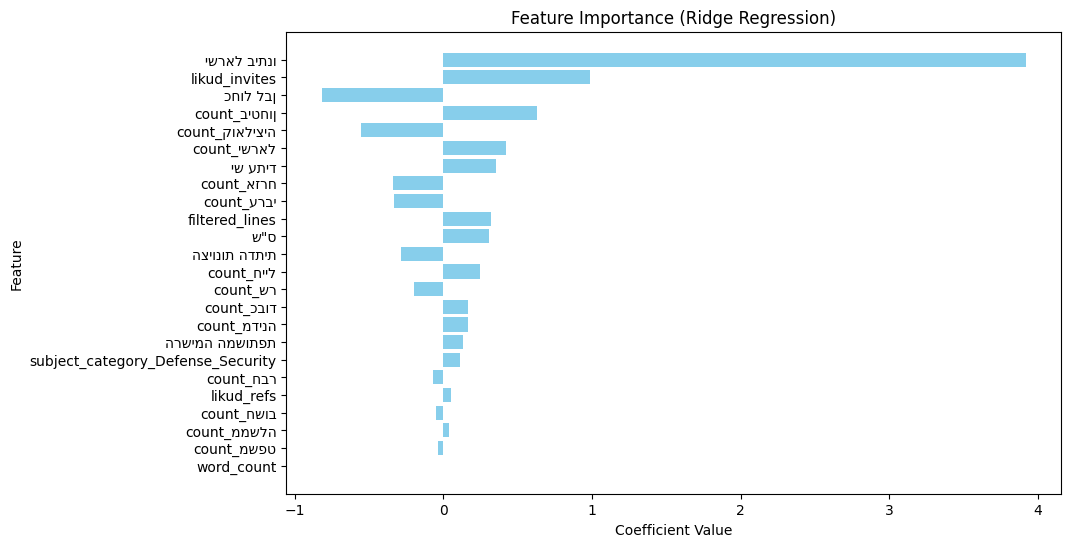

In [ ]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = Ridge(alpha=study.best_params["alpha"])
best_model.fit(X, y)

# Get feature coefficients
feature_importance = best_model.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": feature_importance
}).sort_values(by="Coefficient", key=abs, ascending=False)  # Sort by absolute value

# Display the feature importance
print(importance_df)

# Optional: Plot feature coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Ridge Regression)")
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()


In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    max_depth = trial.suggest_int("max_depth", 1, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Initialize the Decision Tree Regressor
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and predict
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test)

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store R² for tracking
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-09 23:08:32,718] A new study created in memory with name: no-name-1c032ac8-3266-4a97-836b-439bf6f7fb17
[I 2024-12-09 23:08:36,137] Trial 0 finished with value: 31.914132470962898 and parameters: {'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 31.914132470962898.
[I 2024-12-09 23:08:37,363] Trial 1 finished with value: 26.82798988081794 and parameters: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 26.82798988081794.
[I 2024-12-09 23:08:38,377] Trial 2 finished with value: 22.919642533181808 and parameters: {'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 2 with value: 22.919642533181808.
[I 2024-12-09 23:08:39,435] Trial 3 finished with value: 27.41748159662826 and parameters: {'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 2 with value: 22.919642533181808.
[I 2024-12-09 23:08:40,542] Trial 4 finished with value: 24.36891

Best Hyperparameters: {'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 2}
Best RMSE: 22.919642533181808
Best R²: 0.7799593030724541


In [ ]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    alpha = trial.suggest_float("alpha", 0.0001, 1.0, log=True)  # Regularization strength

    # Initialize the Lasso regressor
    model = Lasso(alpha=alpha, random_state=42, max_iter=10000)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and predict
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test)

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store R² for tracking
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-09 23:12:16,016] A new study created in memory with name: no-name-e6162573-378b-4c99-b28d-459e03f711bc
[I 2024-12-09 23:12:19,319] Trial 0 finished with value: 14.351831631846151 and parameters: {'alpha': 0.00011145621945635143}. Best is trial 0 with value: 14.351831631846151.
[I 2024-12-09 23:12:21,150] Trial 1 finished with value: 14.351234493781764 and parameters: {'alpha': 0.0015627826509083216}. Best is trial 1 with value: 14.351234493781764.
[I 2024-12-09 23:12:22,729] Trial 2 finished with value: 14.34779471542359 and parameters: {'alpha': 0.009698744245236056}. Best is trial 2 with value: 14.34779471542359.
[I 2024-12-09 23:12:24,326] Trial 3 finished with value: 14.348701771295149 and parameters: {'alpha': 0.007504384105368758}. Best is trial 2 with value: 14.34779471542359.
[I 2024-12-09 23:12:26,973] Trial 4 finished with value: 14.350939023571385 and parameters: {'alpha': 0.0022618970971903913}. Best is trial 2 with value: 14.34779471542359.
[I 2024-12-09 23:12:2

Best Hyperparameters: {'alpha': 0.3315058345740625}
Best RMSE: 14.278124484742587
Best R²: 0.9146055471505257


                              Feature  Coefficient
5                         ישראל ביתנו     3.861077
8                       likud_invites     0.969559
6                            כחול לבן    -0.734381
22                       count_ביטחון     0.577750
23                     count_קואליציה    -0.427589
12                        count_ישראל     0.420482
4                             יש עתיד     0.345761
0                      filtered_lines     0.324824
17                         count_אזרח    -0.298470
7                                 ש"ס     0.295413
2                       הציונות הדתית    -0.283553
18                         count_ערבי    -0.277857
20                         count_חייל     0.225654
15                           count_שר    -0.197460
13                        count_מדינה     0.114889
10  subject_category_Defense_Security     0.113657
3                      הרשימה המשותפת     0.103920
19                         count_כבוד     0.100988
11                          cou

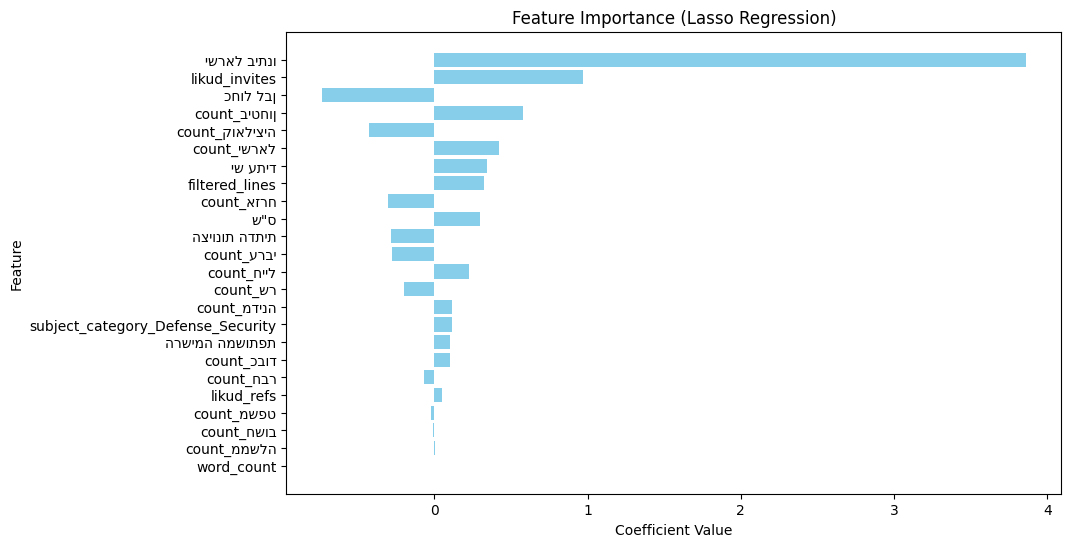

In [ ]:
# Train the final model with the best hyperparameters on the entire dataset
final_model = Lasso(alpha=study.best_params["alpha"], random_state=42, max_iter=10000)
final_model.fit(X, y)

# Extract feature coefficients
feature_importance = final_model.coef_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": feature_importance
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Display the feature importance
print(importance_df)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Lasso Regression)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    alpha = trial.suggest_float("alpha", 0.0001, 1.0, log=True)  # Regularization strength
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)  # Lasso vs Ridge regularization balance

    # Initialize the Elastic Net model
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and predict
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test)

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store R² for tracking
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-09 23:17:28,070] A new study created in memory with name: no-name-5cf24f7c-ee49-4eea-b603-bcf5c840293a
[I 2024-12-09 23:17:31,564] Trial 0 finished with value: 14.351780677154387 and parameters: {'alpha': 0.00031253636868683337, 'l1_ratio': 0.6322707602457593}. Best is trial 0 with value: 14.351780677154387.
[I 2024-12-09 23:17:34,329] Trial 1 finished with value: 14.349117154046862 and parameters: {'alpha': 0.015429961184357271, 'l1_ratio': 0.2030285591459936}. Best is trial 1 with value: 14.349117154046862.
[I 2024-12-09 23:17:36,843] Trial 2 finished with value: 14.351439520860467 and parameters: {'alpha': 0.0012170597937881755, 'l1_ratio': 0.8076174849826135}. Best is trial 1 with value: 14.349117154046862.
[I 2024-12-09 23:17:38,427] Trial 3 finished with value: 14.33046606748989 and parameters: {'alpha': 0.06468232491401352, 'l1_ratio': 0.8404816940787807}. Best is trial 3 with value: 14.33046606748989.
[I 2024-12-09 23:17:40,424] Trial 4 finished with value: 14.351209

Best Hyperparameters: {'alpha': 0.3354952002868924, 'l1_ratio': 0.9990069193796093}
Best RMSE: 14.278059437861945
Best R²: 0.9146063252121172


In [ ]:

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    "Actual (y)": y,
    "Predicted (y_pred)": y_pred
}).reset_index(drop=True)

# Display the first few rows
print(comparison_df)

# Optionally save the DataFrame as a CSV file
comparison_df.to_csv("y_vs_y_pred.csv", index=False)


     Actual (y)  Predicted (y_pred)
0             0            0.000000
1             8           20.742063
2             1            0.000000
3             6            1.505511
4            13            0.000000
..          ...                 ...
179           3           13.503837
180          49           40.651374
181          38           36.322428
182          42           42.582284
183           1            1.459439

[184 rows x 2 columns]


In [ ]:
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    alpha = trial.suggest_float("alpha", 0.0001, 1.0, log=True)
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

    # Initialize Elastic Net with suggested hyperparameters
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()
    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train and predict
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test)

    # Calculate metrics
    mean_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mean_r2 = r2_score(y_true, y_pred)

    # Store R² for tracking
    trial.set_user_attr("mean_r2", mean_r2)

    return mean_rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters, RMSE, and R²
best_trial = study.best_trial
best_rmse = best_trial.value
best_r2 = best_trial.user_attrs["mean_r2"]

print("Best Hyperparameters:", best_trial.params)
print("Best RMSE:", best_rmse)
print("Best R²:", best_r2)


[I 2024-12-10 09:59:00,863] A new study created in memory with name: no-name-14cfd103-874a-49d0-9837-305f58ddca39
[I 2024-12-10 09:59:02,289] Trial 0 finished with value: 14.855647693148565 and parameters: {'alpha': 0.22331498618586362, 'l1_ratio': 0.7214492306786477}. Best is trial 0 with value: 14.855647693148565.
[I 2024-12-10 09:59:03,777] Trial 1 finished with value: 14.343736384565213 and parameters: {'alpha': 0.14000450303830816, 'l1_ratio': 0.7816897868345472}. Best is trial 1 with value: 14.343736384565213.
[I 2024-12-10 09:59:05,606] Trial 2 finished with value: 13.964475848186513 and parameters: {'alpha': 0.11506865508800726, 'l1_ratio': 0.9865547930851584}. Best is trial 2 with value: 13.964475848186513.
[I 2024-12-10 09:59:09,110] Trial 3 finished with value: 14.445379855295238 and parameters: {'alpha': 0.07429034722115875, 'l1_ratio': 0.5487557381305791}. Best is trial 2 with value: 13.964475848186513.
[I 2024-12-10 09:59:11,649] Trial 4 finished with value: 14.3458844983

Best Hyperparameters: {'alpha': 0.5498427102348975, 'l1_ratio': 0.9992637975651538}
Best RMSE: 13.470469819960293
Best R²: 0.9239931352398318


R² Score: 0.9687
RMSE: 8.6483
Accuracy: 54.66%
                              Feature  Coefficient
5                         ישראל ביתנו     3.743840
8                       likud_invites     0.957289
6                            כחול לבן    -0.659755
22                       count_ביטחון     0.546087
12                        count_ישראל     0.420739
23                     count_קואליציה    -0.367177
4                             יש עתיד     0.336312
0                      filtered_lines     0.327942
7                                 ש"ס     0.289080
2                       הציונות הדתית    -0.281802
17                         count_אזרח    -0.269586
18                         count_ערבי    -0.248309
20                         count_חייל     0.224352
15                           count_שר    -0.198917
10  subject_category_Defense_Security     0.112773
3                      הרשימה המשותפת     0.084965
13                        count_מדינה     0.079934
11                          count_ח

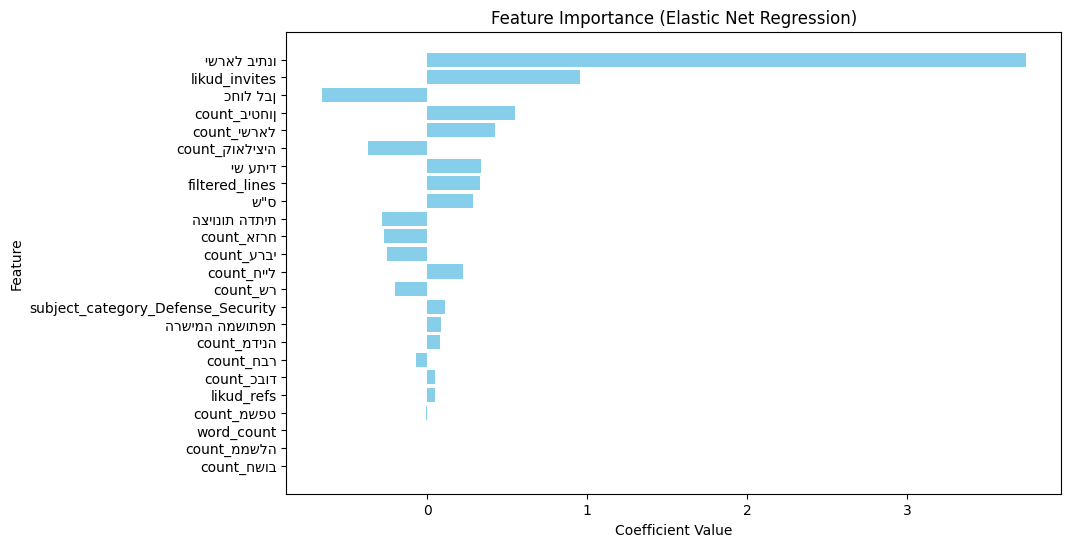

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


# features and target
X = research_data.drop(columns=["lines_likud", "subject"], axis=1)
y = research_data["lines_likud"]

# Train
final_model = ElasticNet(
    alpha=0.5498427102348975,
    l1_ratio=0.9992637975651538,
    random_state=42,
    max_iter=10000
)
final_model.fit(X, y)

# Predictions
y_pred = final_model.predict(X)

y_pred = np.where(y_pred < 0, 0, y_pred)


# Calculate metrics
r2 = r2_score(y, y_pred)  # R² score
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Root Mean Squared Error
accuracy = 100 - (rmse / np.mean(y) * 100)  # Relative Accuracy as a percentage

# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Extract feature coefficients
feature_importance = final_model.coef_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": feature_importance
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Display the feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Elastic Net Regression)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pickle

metadata = {
    "model": final_model,
    "hyperparameters": best_trial.params,
    "columns": list(X.columns)
}
with open("reg_model.pkl", "wb") as file:
    pickle.dump(metadata, file)


In [ ]:
pip install requests


In [ ]:
https://drive.google.com//uc?id=1QxEkkaGQNVERLeB6O3aj6ES32EgiX6jJ

In [ ]:
import pickle
import requests

# Replace FILE_ID with your actual file ID from the Google Drive link
url = "https://drive.google.com//uc?id=1QxEkkaGQNVERLeB6O3aj6ES32EgiX6jJ"

# Download the pickle file
response = requests.get(url)
with open("model_metadata.pkl", "wb") as file:
    file.write(response.content)

# Load the pickle file
with open("model_metadata.pkl", "rb") as file:
    metadata = pickle.load(file)

# Extract the model, hyperparameters, and columns
model = metadata["model"]
hyperparameters = metadata["hyperparameters"]
columns = metadata["columns"]

# Display the extracted data
print("Model loaded successfully!")
print("Hyperparameters:", hyperparameters)
print("Columns:", columns)


Model loaded successfully!
Hyperparameters: {'alpha': 0.5498427102348975, 'l1_ratio': 0.9992637975651538}
Columns: ['filtered_lines', 'word_count', 'הציונות הדתית', 'הרשימה המשותפת', 'יש עתיד', 'ישראל ביתנו', 'כחול לבן', 'ש"ס', 'likud_invites', 'likud_refs', 'subject_category_Defense_Security', 'count_חבר', 'count_ישראל', 'count_מדינה', 'count_ממשלה', 'count_שר', 'count_חשוב', 'count_אזרח', 'count_ערבי', 'count_כבוד', 'count_חייל', 'count_משפט', 'count_ביטחון', 'count_קואליציה']


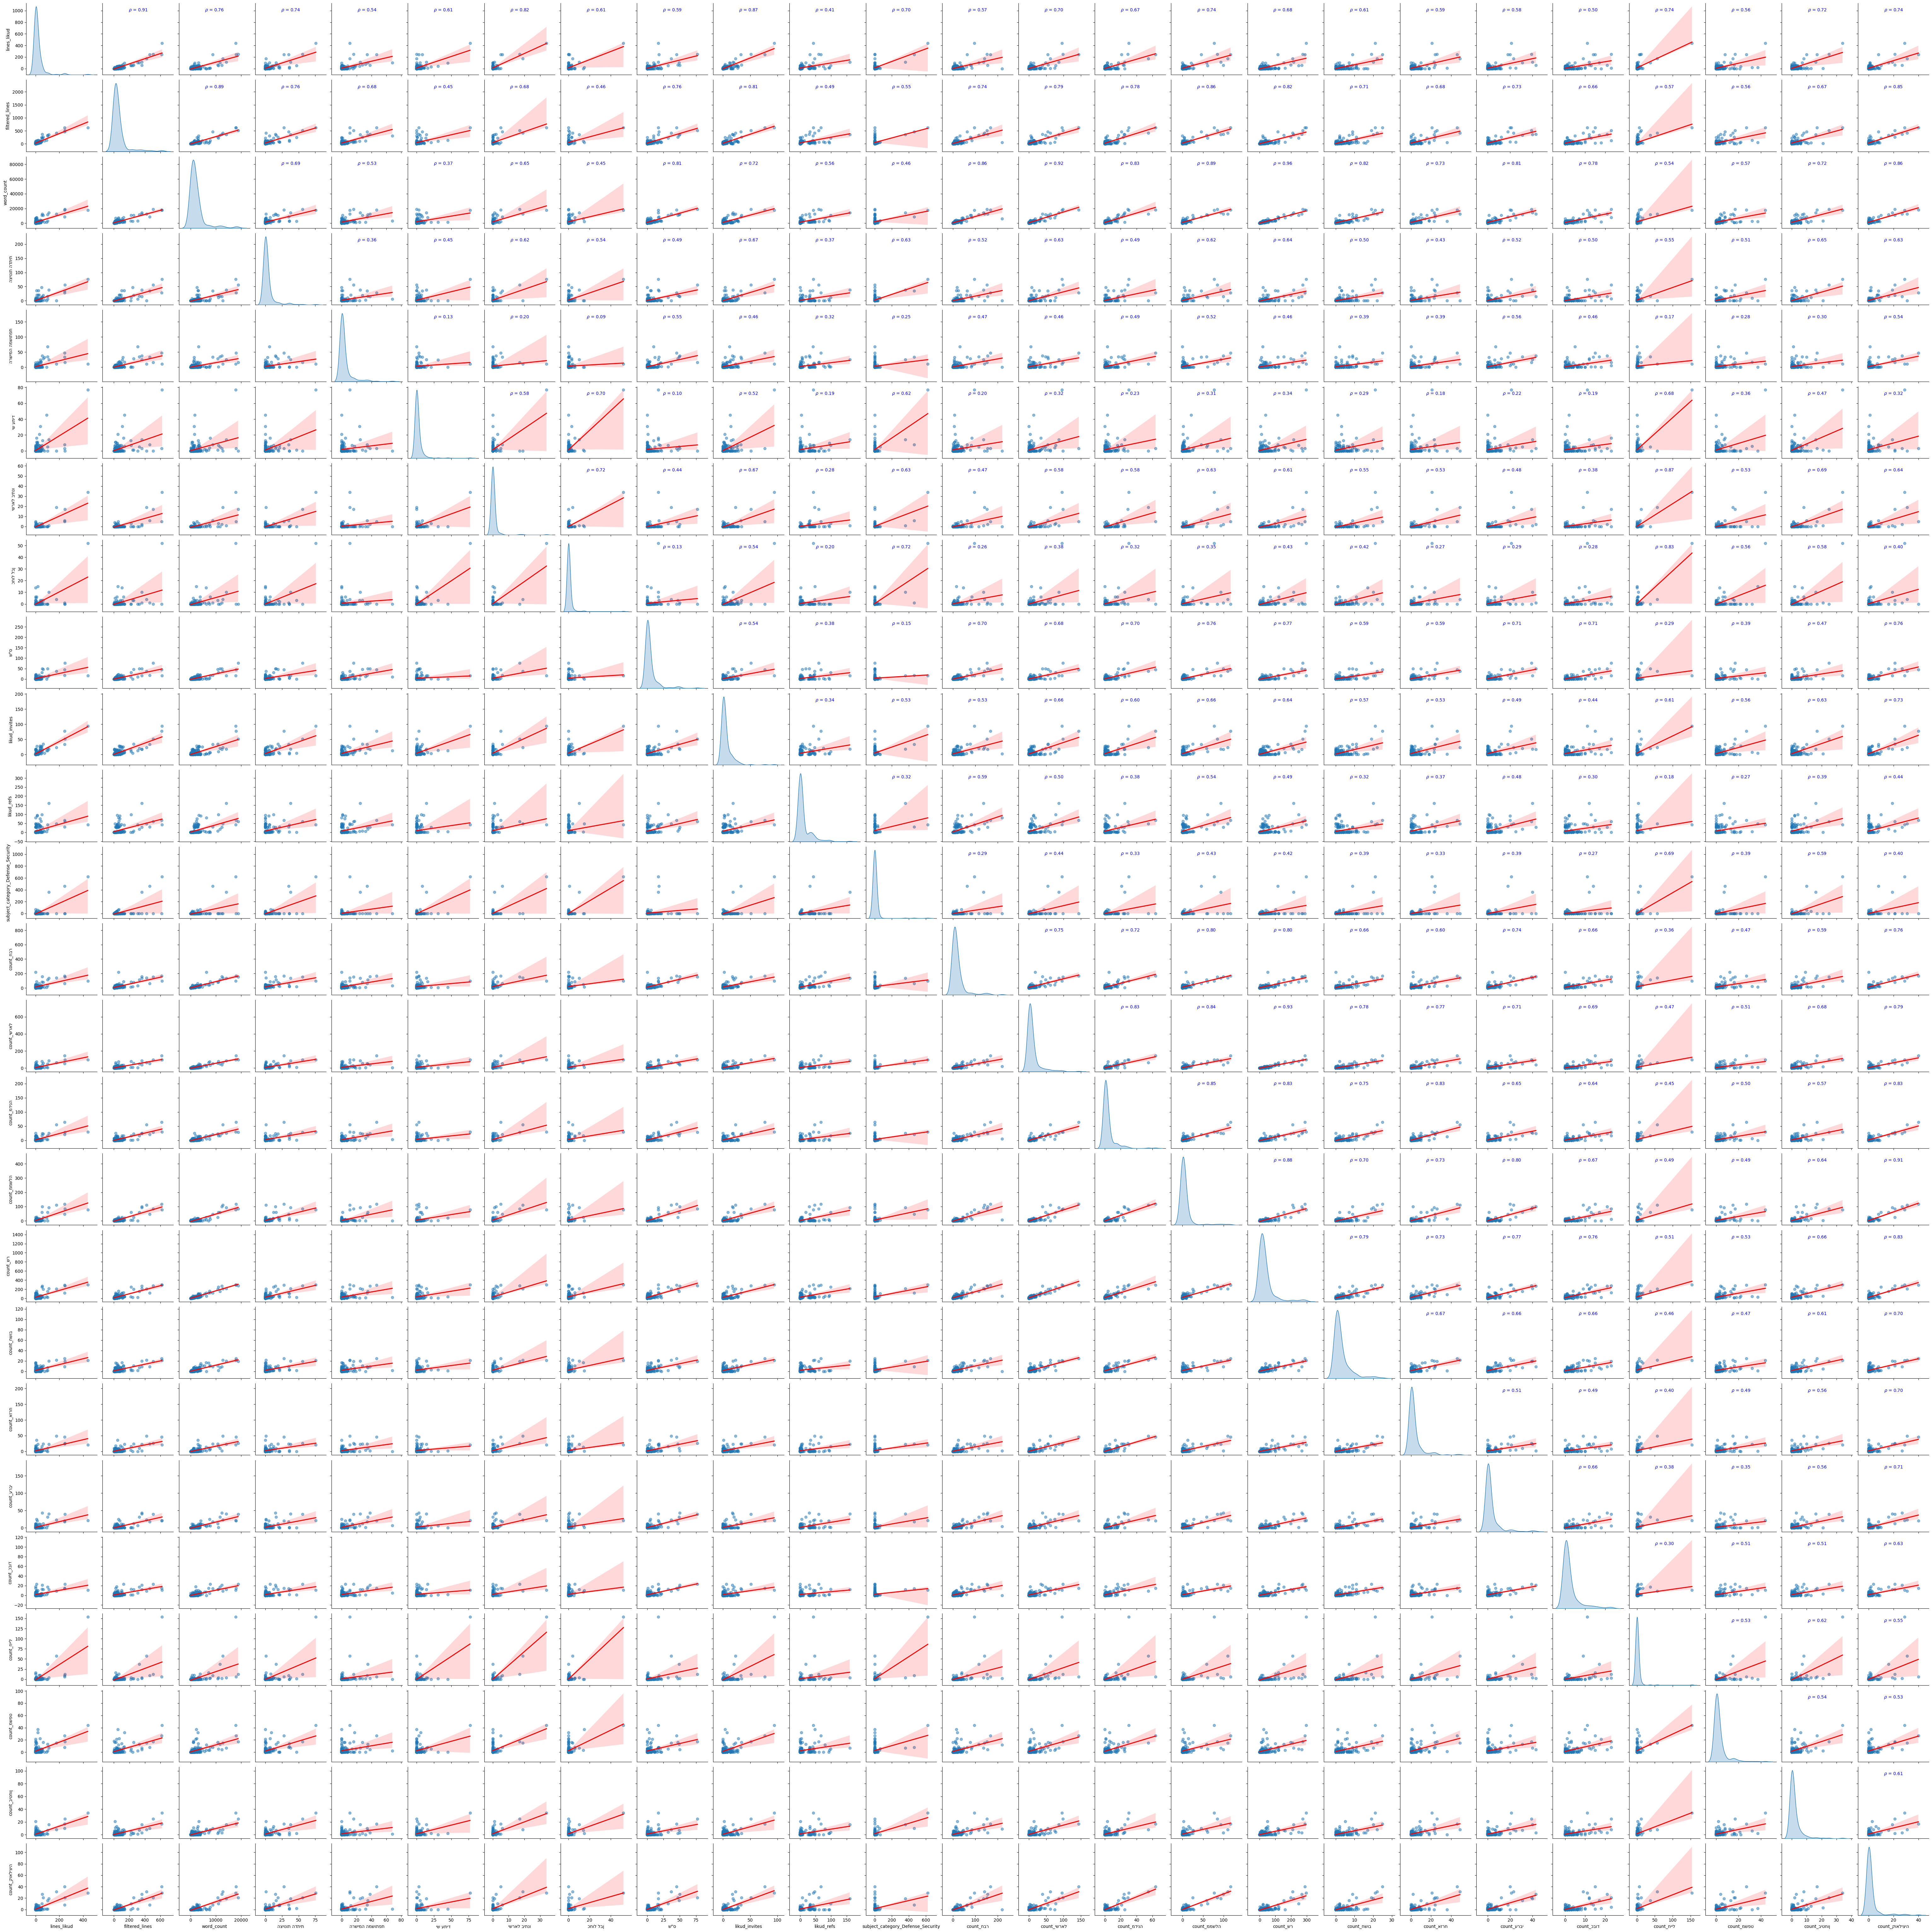

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Drop non-numeric column
dtt = research_data.drop(["subject"], axis=1)

# Function to annotate correlation coefficients
def annotate_corr(x, y, ax):
    # Drop NaN values for correlation calculation
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    if len(x) > 1:  # Ensure there are enough points for correlation
        corr = np.corrcoef(x, y)[0, 1]  # Compute correlation
        ax.text(0.5, 0.9, f"$\\rho$ = {corr:.2f}", transform=ax.transAxes,
                ha="center", va="center", fontsize=10, color="blue")
    else:
        ax.text(0.5, 0.9, "N/A", transform=ax.transAxes,
                ha="center", va="center", fontsize=10, color="red")

# Create pairplot
g = sns.pairplot(dtt, kind="reg", diag_kind="kde", plot_kws={'scatter_kws': {'alpha': 0.5}, 'line_kws': {'color': 'red'}})

# Annotate correlation coefficients
num_vars = len(dtt.columns)
for i in range(num_vars):
    for j in range(i + 1, num_vars):  # Only upper triangle
        ax = g.axes[i, j]
        annotate_corr(dtt.iloc[:, j], dtt.iloc[:, i], ax)

# Show plot
plt.show()


In [ ]:
# Plot the heatmap
plt.figure(figsize=(16, 12))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
